169017344/169001437 [==============================] - 29s 0us/step


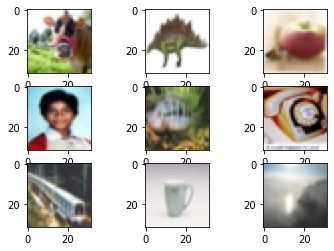

In [ ]:
from keras.datasets import cifar100
(X_train,y_train),(X_test,y_test)=cifar100.load_data()
X=X_test
import matplotlib.pyplot as plt

for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()

X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
from tensorflow.keras.utils import to_categorical as tcg
y_train=tcg(y_train,100)
y_test=tcg(y_test,100)
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
ci_far100=model.fit(X_train,y_train,batch_size=128,epochs=5,verbose=1,validation_data=(X_test,y_test))
model.save('ci_far100.h5')

Epoch 1/5
391/391 [==============================] - 18s 43ms/step - loss: 4.3297 - accuracy: 0.0453 - val_loss: 4.0236 - val_accuracy: 0.0851
Epoch 2/5
391/391 [==============================] - 17s 43ms/step - loss: 3.9610 - accuracy: 0.0890 - val_loss: 3.7969 - val_accuracy: 0.1233
Epoch 3/5
391/391 [==============================] - 17s 43ms/step - loss: 3.8104 - accuracy: 0.1125 - val_loss: 3.7644 - val_accuracy: 0.1252
Epoch 4/5
391/391 [==============================] - 17s 43ms/step - loss: 3.7230 - accuracy: 0.1297 - val_loss: 3.7692 - val_accuracy: 0.1295
Epoch 5/5
391/391 [==============================] - 17s 43ms/step - loss: 3.6559 - accuracy: 0.1394 - val_loss: 3.6015 - val_accuracy: 0.1603


313/313 [==============================] - 2s 8ms/step - loss: 3.6015 - accuracy: 0.1603
test loss = 3.6014554500579834
test accurmary = 0.16030000150203705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


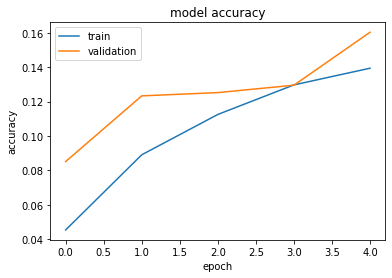

In [ ]:
score=model.evaluate(X_test,y_test,verbose=1)  
print('test loss =',score[0])
print('test accurmary =',score[1])
from matplotlib import pyplot as plt
plt.plot(ci_far100.history['accuracy'])
plt.plot(ci_far100.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')